In [1]:
import findspark 
findspark.init()
findspark.find()
from pyspark.sql.types import IntegerType, FloatType ,DateType
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.functions import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
from functools import reduce 
from pyspark.sql import DataFrame

In [2]:
spark = SparkSession \
    .builder \
    .appName("pyspark2 ") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [3]:
df = spark.read.csv("C:/Users/PC/Downloads/practiceDA.csv", header =True)
df= df.withColumn('Code', F.col('Code').cast(IntegerType()))\
        .withColumn('age', F.col('age').cast(IntegerType()))\
        .withColumn('year_of_school',F.col('year_of_school').cast(IntegerType()))\
        .withColumn('know_english', F.col('know_english').cast(IntegerType()))\
        .withColumn('know_france', F.col('know_france').cast(IntegerType()))\
        .withColumn('know_chinese', F.col('know_chinese').cast(IntegerType()))\
        .withColumn('income', F.col('income').cast(IntegerType()))\
        .withColumn('flight_status', F.col('flight_status').cast(IntegerType()))\
        .withColumn('professionally_staff', F.col('professionally_staff').cast(IntegerType()))\
        .withColumn('customer_service ', F.col('customer_service ').cast(IntegerType()))\
        .withColumn('diversity_product', F.col('diversity_product').cast(IntegerType()))\
        .withColumn('good_price', F.col('good_price').cast(IntegerType()))\
        .withColumn('easily_transaction', F.col('easily_transaction').cast(IntegerType()))\
        .withColumn('goodlooking_staff', F.col('goodlooking_staff').cast(IntegerType()))\
        .withColumn('diversity_flighttime', F.col('diversity_flighttime').cast(IntegerType()))\
        .withColumn('good_construction', F.col('good_construction').cast(IntegerType()))

### Task 1 

<AxesSubplot:>

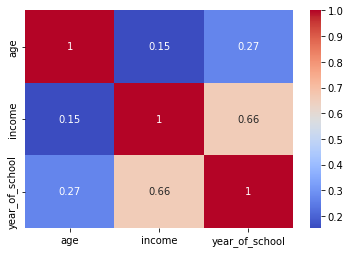

In [4]:
data = df.toPandas() 
dic={'age': data['age'].tolist(),'income': data['income'].tolist(),'year_of_school':data['year_of_school'].tolist()}
sns.heatmap(pd.DataFrame(data=dic).corr(),annot=True,cmap='coolwarm')

### Task 2 

In [5]:
df = df.withColumn("income condition", when(df.income < 9000,"low income")
                                 .when(df.income.between(9000,15000),"medium income")
                                 .when(df.income >15000 ,"high income")
                                 .otherwise(df.income))
df.groupby('income condition').agg({'Code':'count'}).show()

+----------------+-----------+
|income condition|count(Code)|
+----------------+-----------+
|     high income|        121|
|      low income|         85|
|   medium income|        294|
+----------------+-----------+



### Task 3 

In [6]:
func =  udf (lambda x: datetime.strptime(x, '%d/%m/%Y'), DateType())
df = df.withColumn('booking_date', func(col('booking_date')))\
    .withColumn('flight_date',func(col('flight_date')))
df = df.withColumn('range_day_flight', (df['flight_date'] - df['booking_date']))                             
df.select(df['range_day_flight']).show()                            

+------------------+
|  range_day_flight|
+------------------+
| INTERVAL '25' DAY|
| INTERVAL '47' DAY|
| INTERVAL '97' DAY|
|INTERVAL '106' DAY|
|INTERVAL '168' DAY|
|INTERVAL '314' DAY|
|INTERVAL '308' DAY|
| INTERVAL '63' DAY|
| INTERVAL '63' DAY|
|INTERVAL '310' DAY|
| INTERVAL '24' DAY|
| INTERVAL '26' DAY|
| INTERVAL '25' DAY|
| INTERVAL '47' DAY|
|INTERVAL '104' DAY|
| INTERVAL '58' DAY|
| INTERVAL '16' DAY|
| INTERVAL '46' DAY|
| INTERVAL '47' DAY|
| INTERVAL '58' DAY|
+------------------+
only showing top 20 rows



### Task 4 

In [7]:
fm_df=df.filter(df['gender']=='female')
fm_df=fm_df.withColumn('subsidize',df['income']*0.05)
fm_df.select(fm_df['subsidize']).show()

+---------+
|subsidize|
+---------+
|   1662.5|
|    348.0|
|    555.0|
|    570.0|
|    375.0|
|    456.0|
|    513.0|
|    429.0|
|    816.0|
|    549.0|
|    570.0|
|    450.0|
|    333.0|
|    483.0|
|    480.0|
|   1135.0|
|    489.0|
|    438.0|
|    666.0|
|    393.0|
+---------+
only showing top 20 rows



### Task 5 

In [8]:
fm_df=fm_df.withColumn('reality income',(fm_df['income']+fm_df['subsidize'])).drop(fm_df['subsidize'])
m_df=df.filter(df['gender']=='male')
m_df=m_df.withColumn('reality income',df['income'])
m_df=m_df.drop(m_df['range_day_flight'])
fm_df=fm_df.drop(fm_df['range_day_flight'])
def unionAll(*dfs):
    return reduce(DataFrame.unionAll, dfs)
final_df=unionAll(m_df,fm_df)
final_df.select(final_df['reality income']).show()

+--------------+
|reality income|
+--------------+
|       11100.0|
|       16140.0|
|       10020.0|
|       23760.0|
|       10680.0|
|       17950.0|
|        8700.0|
|       11220.0|
|       14400.0|
|       14100.0|
|        9600.0|
|       10020.0|
|       19200.0|
|       14100.0|
|       33500.0|
|       41400.0|
|       15660.0|
|       30000.0|
|       20000.0|
|       27500.0|
+--------------+
only showing top 20 rows



### Task 6 

In [12]:
final_df = final_df.withColumn("Tax_percent", when(final_df.income < 10000,0.05)
                                 .when(final_df.income.between(10000,30000),0.07)
                                 .when(final_df.income >30000 ,0.1)
                                 .otherwise(final_df.income))
final_df=final_df.withColumn('personal income tax',(final_df['reality income']*final_df['tax_percent']))
final_df.select(final_df['personal income tax']).show()

+-------------------+
|personal income tax|
+-------------------+
|  777.0000000000001|
| 1129.8000000000002|
|  701.4000000000001|
|             1663.2|
|              747.6|
| 1256.5000000000002|
|              435.0|
|  785.4000000000001|
| 1008.0000000000001|
|  987.0000000000001|
|              480.0|
|  701.4000000000001|
| 1344.0000000000002|
|  987.0000000000001|
|             3350.0|
|             4140.0|
|             1096.2|
|             2100.0|
| 1400.0000000000002|
| 1925.0000000000002|
+-------------------+
only showing top 20 rows



### Task 7 

Text(0.5, 1.0, 'Thống kê số lượng đặt vé mỗi tháng năm 2013')

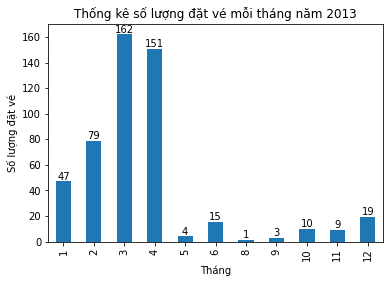

In [14]:
data.booking_date = pd.to_datetime(data['booking_date'], format='%d/%m/%Y')
data.flight_date = pd.to_datetime(data['flight_date'], format='%d/%m/%Y')
data['month']=data['booking_date'].dt.month
ax=data.groupby('month')['Code'].count().plot.bar()
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Tháng')
plt.ylabel('Số lượng đặt vé')
plt.title('Thống kê số lượng đặt vé mỗi tháng năm 2013')